# 크롬웹드라이버 다운로드

# https://chromedriver.storage.googleapis.com/index.html

크롬 웹드라이버를 다운로드하여 소스디렉터리에 압축해제하여
복사해준다. 

# 모듈 설치

In [9]:
! pip install selenium

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [10]:
!pip install pillow

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [11]:
!pip install bs4

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [12]:
!pip install requests

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [13]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [14]:
from selenium import webdriver
import time

driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://www.instagram.com')
time.sleep(2)

# 인스타 접속 URL 함수 생성

In [15]:
#%%writefile d:/python/insta_searching.py

def insta_searching(word) : 
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

# 인스타에 자동로그인하기

In [18]:
email =  "oddeven98"
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password =  "evenodd00"
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

### 정보저장 > 설정 등의 항목은 수동으로 설정한다.

In [16]:
word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

# 첫번째 게시글 선택하기

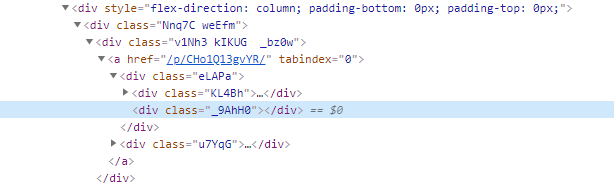

In [17]:
def select_first(driver) :
    first = driver.find_element_by_css_selector('div._9AhH0')
    first.click()
    time.sleep(3)

select_first(driver)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div._9AhH0"}
  (Session info: chrome=87.0.4280.66)


# 게시글 가져오기

In [ ]:
import re
from bs4 import BeautifulSoup

def get_content(driver) :
    # 현재 페이지 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 본문 내용 가져오기 (예외처리)
    try :
        content = soup.select('div.C4VMK > span')[0].text
        
    except : 
        content = ' '
        
    # 해시태그 가져오기
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    # 작성일자 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    # 좋아여 숫자 가져오기
    try :
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]
        
    except :
        like = 0
        
    # 위치정보 가져오기
    try :
        place = soup.select('div.M30cS')[0].text
        
    except :
        place = ''
        
    # 현재 수집한 정보를 저장하기
    data = [content, date, like, place, tags]
    
    return data

get_content(driver)

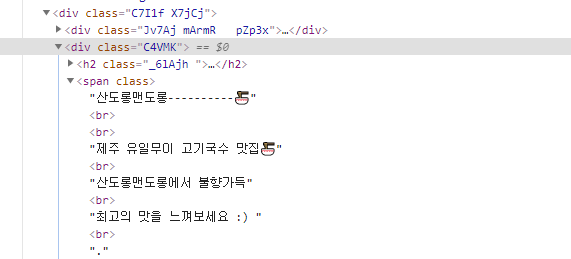

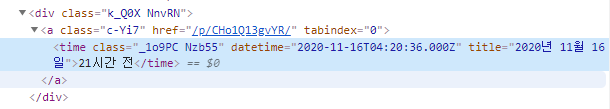

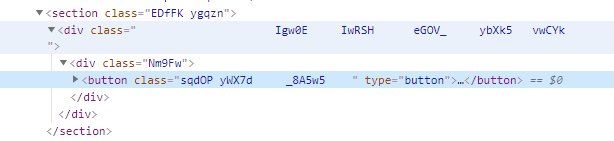

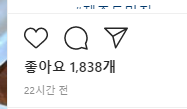

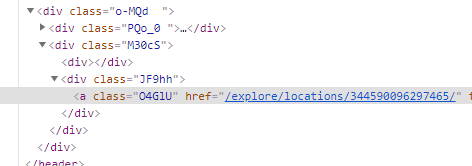

# 다음 게시글 열기

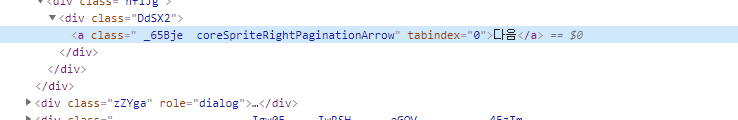

In [18]:
def move_next(driver) :
    right = driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)
    
move_next(driver)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a.coreSpriteRightPaginationArrow"}
  (Session info: chrome=87.0.4280.66)


In [19]:
%%writefile d:/python/insta_1.py

from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

#웹 드라이버 열기
driver = webdriver.Chrome('chromedriver.exe')

#인스타그램 접속 후 자동로그인하기
driver.get('https://www.instagram.com')
time.sleep(2)

email =  "아이디"
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password =  "비밀번호"
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

Overwriting d:/python/insta_1.py


In [26]:
#인스타 크롤링하기

In [20]:
from insta_searchinng import insta_searching as insta_searching

ModuleNotFoundError: No module named 'insta_searchinng'

In [21]:
word = "제주도맛집"
url = insta_searching(word)

In [22]:

# 접속 URL 생성
word = "제주도맛집"
url = insta_searching(word)

# 인스타 검색 페이지 접속하기
driver.get(url)
time.sleep(3)

# 첫번째 게시글 선택
select_first(driver)

# 데이터 저장 변수의 초기화
results = []

# 크롤링 게시글수 지정
target = 50

# 반복문으로 정보수집 - 지정된 게시글 수만큼 정보 수집	for문 사용법 -> for ~ in ~ : 
# range(시작값, 마지막값(마지막값 - 1), 증감값) -> 생략하면 기본값들어감. range(target) 은 시작값 생략, 증감값 생략
for i in range(target) :	# 0 ~ 49
	# 게시글 수집
	try :
		data = get_content(driver)
		results.append(data)
		move_next(driver)
	except : 
		time.sleep(2)
		move_next(driver)
    
print(results[:2])

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a.coreSpriteRightPaginationArrow"}
  (Session info: chrome=87.0.4280.66)


In [1]:
!pip install pandas

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install xlrd

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install xlwt

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install xlsxwriter

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\kitri\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd

results_df = pd.DataFrame(results)	
results_df.columns = ['content', 'data', 'like', 'place', 'tags']		# 필드 이름 지정
results_df.to_excel('insta_jeju_Matjip.xlsx')		# 액셀로 저장

In [24]:
pd.read_excel('insta_jeju_Matjip.xlsx')

NameError: name 'pd' is not defined